##### Бронников Максим Андреевич
##### М8О-407Б-17

<h1><center> Автоассоциативные сети с узким горлом </center></h1>

**Целью работы** является исследование свойств автоассоциативных сетей с узким горлом, алгоритмов обучения, а также применение сетей для выполнения линейного и нелинейного анализа главных компонент набора данных.

In [1]:
import pyrenn
from matplotlib import pyplot as plt
import math
import numpy as np
import neurolab as nl
import seaborn as sns
import random
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from mpl_toolkits.mplot3d import Axes3D

**Вариант №4:** 

1. Эллипс: $a = 0.6, \: b = 0.6, \: \alpha = 0, \: x_0 = 0, \: y_0 = 0$
2. $r = e^\phi$

In [2]:
def f(t):
    return 0.6 * np.cos(t)

def g(t):
    return 0.6 * np.sin(t)

def gen_x_y(phi): 
    r = np.exp(phi)
    return r*np.cos(phi), r*np.sin(phi)

### Описание

**Автоассоцитивная сеть с узким горлом**

Автоассоцитивная сеть с узким горлом имеет 1 скрытый слой, выходы которого - главные компоненты входного вектора. Веса же выходного слоя настроены на то, чтобы востановить исходные данные по главной компоненте.

<img src="imgs/1.gif">

Такие сети позволяют сильно сжимать размерность получаемых данных и востонавливать исходные данные с минимальными потерями дисперсии(информации).

### Задание №1

Использовать *автоассоциативную сеть с узким горлом* для отображения набора данных, выделяя первую главную компоненту данных.

Формируем входные данные:

In [3]:
t = np.linspace(0, 2 * np.pi, int(2 * np.pi / 0.025), endpoint=True) 

x = f(t)
y = g(t)

orig = np.array([x, y])

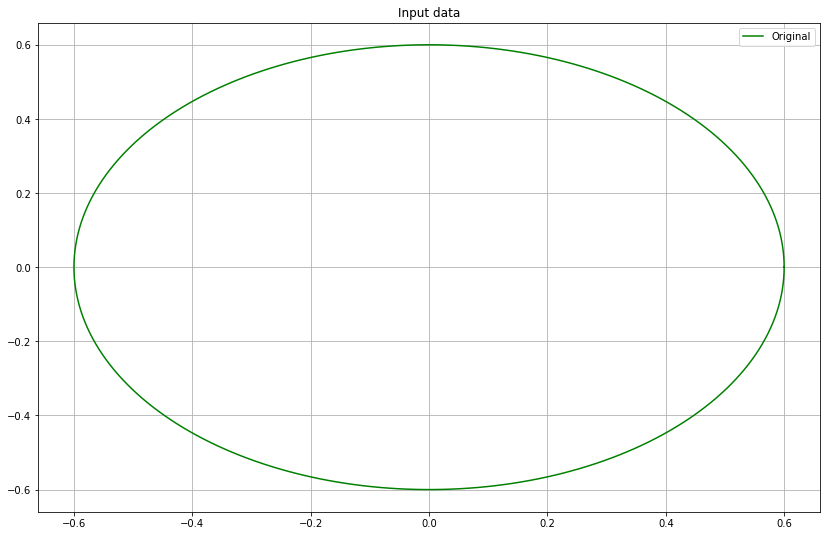

In [4]:
plt.figure(figsize=(14, 9))
plt.plot(orig[0], orig[1], 'green', label="Original")
plt.grid(True)
plt.title('Input data')
plt.legend()
plt.show()

Зададим нейронную сеть с 1 скрытым слоем и используем метод Левенберга-Марквардта в качестве алгоритма обучения.

In [5]:
nn = pyrenn.CreateNN([2, 1, 2])
nn = pyrenn.train_LM(orig, orig, nn, E_stop=1e-5, k_max=200)

Maximum number of iterations reached


Востановленные данные:

In [6]:
pred = pyrenn.NNOut(orig, nn)

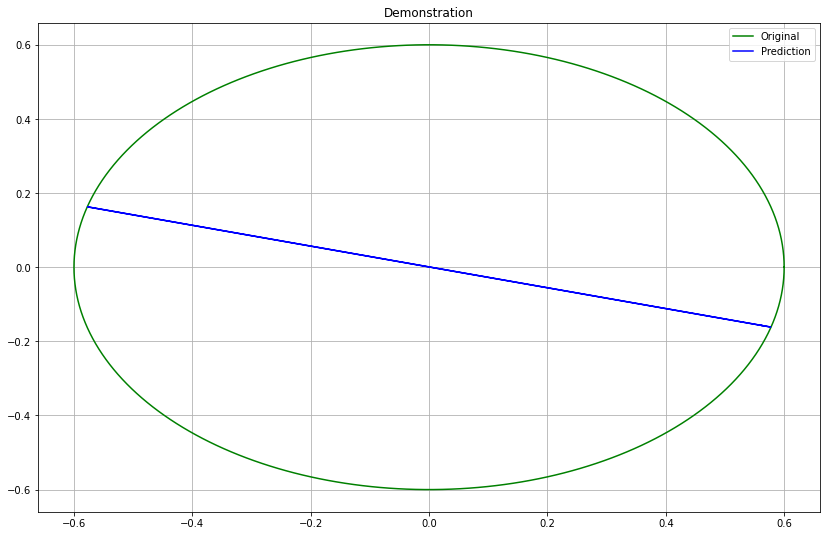

In [7]:
plt.figure(figsize=(14, 9))
plt.plot(orig[0], orig[1], 'green', label="Original")
plt.plot(pred[0], pred[1], 'blue', label="Prediction")
plt.grid(True)
plt.title('Demonstration')
plt.legend()
plt.show()

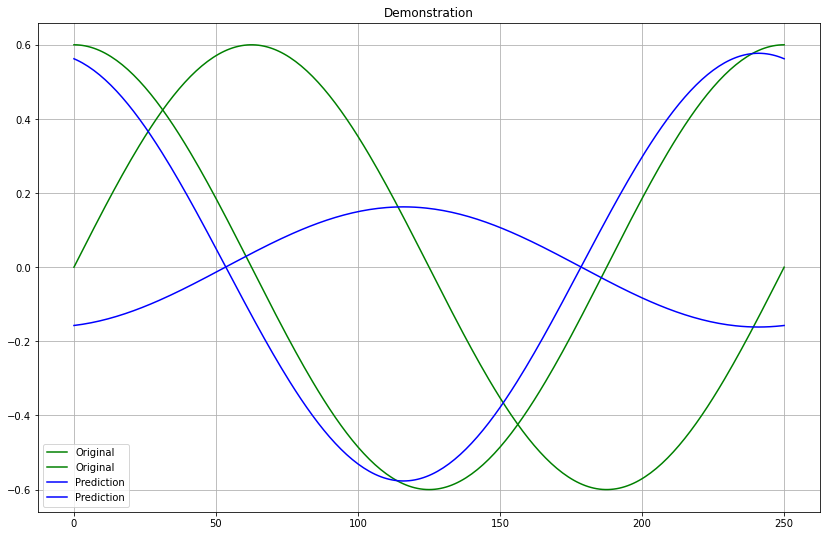

In [8]:
plt.figure(figsize=(14, 9))
plt.plot(orig.T, 'green', label="Original")
plt.plot(pred.T, 'blue', label="Prediction")
plt.grid(True)
plt.title('Demonstration')
plt.legend()
plt.show()

### Задание №2

Использовать *автоассоциативную сеть с узким горлом* для аппроксимации кривой на плоскости, выделяя первую нелинейную главную компоненту данных.

Сгенерируем набор из  точек:

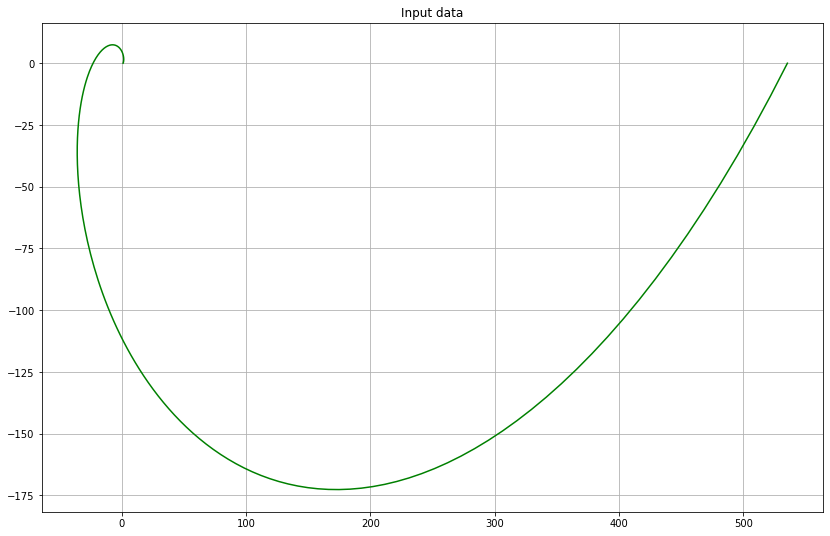

In [9]:
phi = np.linspace(0, 2 * np.pi, int(2 * np.pi / 0.025), endpoint=True) 

x2, y2 = gen_x_y(phi)

plt.figure(figsize=(14, 9))
plt.plot(x2, y2, 'green')
plt.grid(True)
plt.title('Input data')
plt.show()

Обучим сеть:

In [10]:
nn2 = pyrenn.CreateNN([1, 10, 1, 10, 1])

In [11]:
nn2 = pyrenn.train_LM(x2, y2, nn2, E_stop=1e-5, k_max=2000)

Maximum number of iterations reached


Аппроксимируем функцию:

In [12]:
a2 = pyrenn.NNOut(x2, nn2)

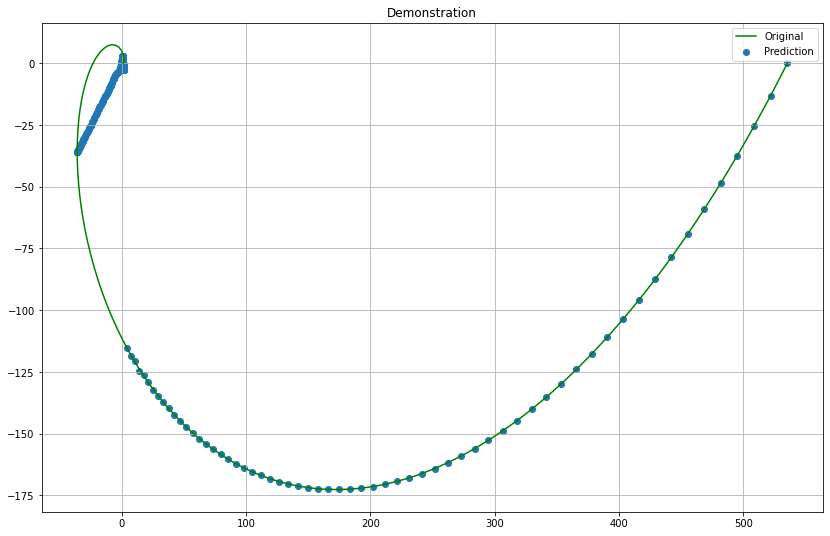

In [13]:
plt.figure(figsize=(14, 9))
plt.plot(x2, y2, 'green', label='Original')
plt.scatter(x2, a2, label='Prediction')
plt.grid(True)
plt.title('Demonstration')
plt.legend()
plt.show()

### Задание №3

Применить *автоассоциативную сеть с узким горлом* для аппроксимации пространственной кривой, выделяя старшие нелинейные главные компоненты данных.

Сгенерируем набор из точек:

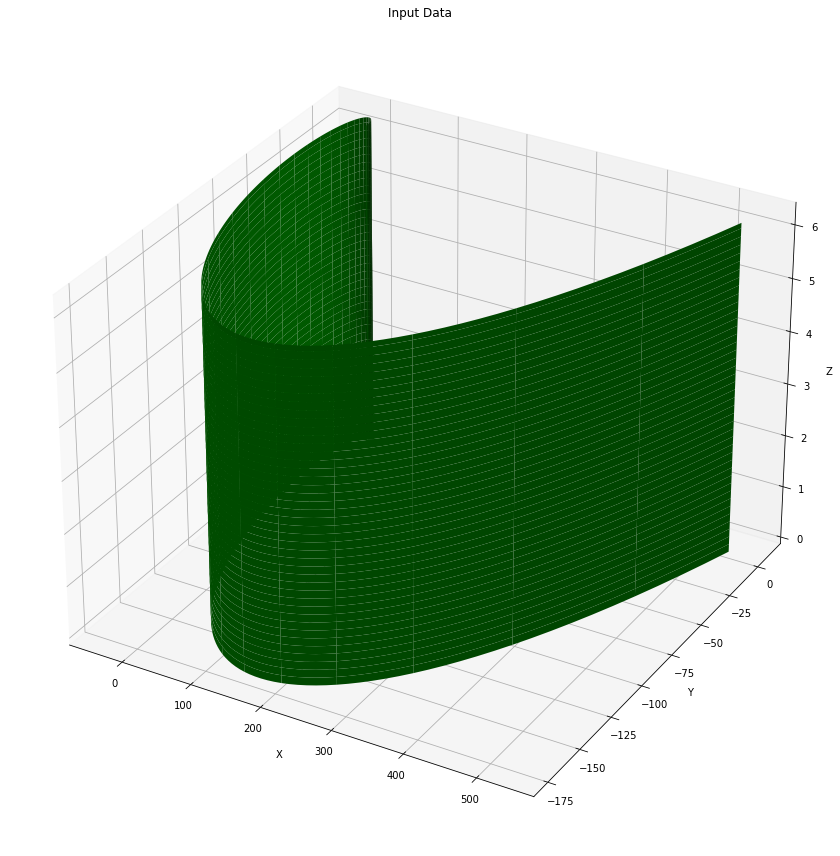

In [14]:
phi = np.linspace(0, 2 * np.pi, int(2 * np.pi / 0.025), endpoint=True) 
x3, y3 = gen_x_y(phi)
z3 = phi


fig = plt.figure(num=1, figsize=(19, 12), clear=True)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x3, y3, z3.reshape(-1, 1), color='green')
ax.set_title('Input Data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.tight_layout()

Создадим и обучим сеть:

In [15]:
nn3 = pyrenn.CreateNN([2, 10, 2,  10, 1])
nn3 = pyrenn.train_LM(np.array([x3, z3]), y3, nn3, E_stop=1e-5, k_max=500)

Termination Error reached


Аппроксимируем функцию:

In [16]:
a3 = pyrenn.NNOut(np.array([x3, z3]), nn3)

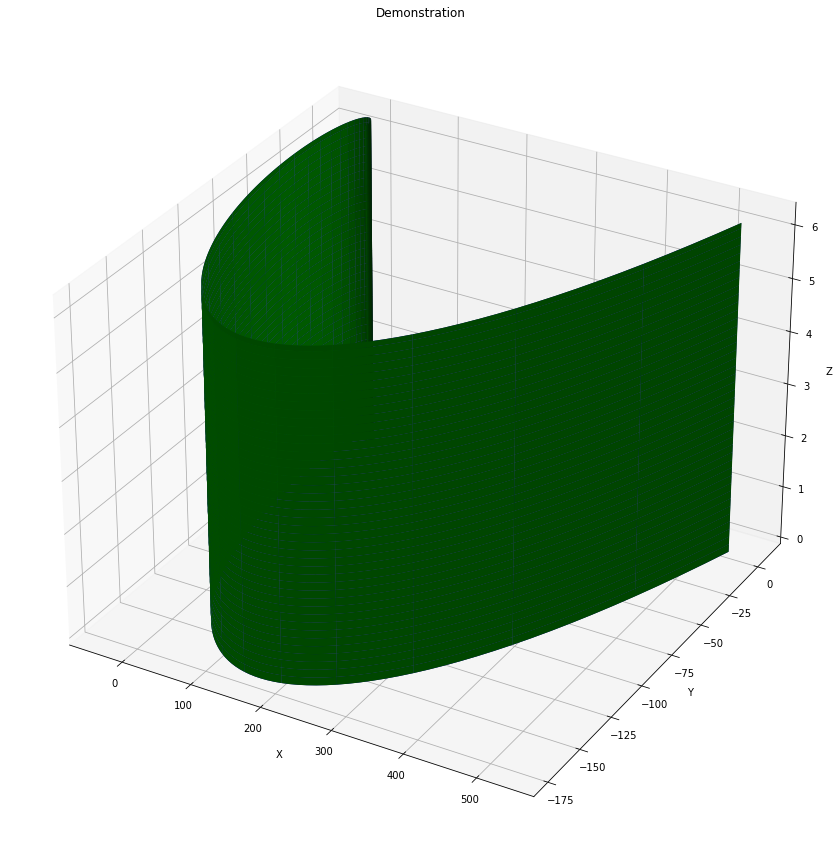

In [17]:
fig = plt.figure(num=1, figsize=(19, 12), clear=True)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x3, y3, z3.reshape(-1, 1), color='green')
ax.plot_surface(x3, a3, z3.reshape(-1, 1), color='blue')
ax.set_title('Demonstration')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.tight_layout()

<center><h5> Выполнил Бронников Максим </h5></center>
<center><h5> 19.03.2021 </h5></center>